In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import mannwhitneyu, ttest_ind
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Read all the data files
products_path = '/content/drive/My Drive/DSA210/Project/Brazil_ecommerce_dataset/olist_products_dataset.csv'
products_df = pd.read_csv(products_path)

sellers_path = '/content/drive/My Drive/DSA210/Project/Brazil_ecommerce_dataset/olist_sellers_dataset.csv'
sellers_df = pd.read_csv(sellers_path)

categoryName_path = '/content/drive/My Drive/DSA210/Project/Brazil_ecommerce_dataset/product_category_name_translation.csv'
categoryName_df = pd.read_csv(categoryName_path)

orderItems_path = '/content/drive/My Drive/DSA210/Project/Brazil_ecommerce_dataset/olist_order_items_dataset.csv'
orderItems_df = pd.read_csv(orderItems_path)

payments_path = '/content/drive/My Drive/DSA210/Project/Brazil_ecommerce_dataset/olist_order_payments_dataset.csv'
payments_df = pd.read_csv(payments_path)

reviews_path = '/content/drive/My Drive/DSA210/Project/Brazil_ecommerce_dataset/olist_order_reviews_dataset.csv'
reviews_df = pd.read_csv(reviews_path)

orders_path = '/content/drive/My Drive/DSA210/Project/Brazil_ecommerce_dataset/olist_orders_dataset.csv'
orders_df = pd.read_csv(orders_path)

customers_path = '/content/drive/My Drive/DSA210/Project/Brazil_ecommerce_dataset/olist_customers_dataset.csv'
customers_df = pd.read_csv(customers_path)

geolocation_path = '/content/drive/My Drive/DSA210/Project/Brazil_ecommerce_dataset/olist_geolocation_dataset.csv'
geolocation_df = pd.read_csv(geolocation_path)

# Merge relevant data
data = orders_df.merge(reviews_df, on='order_id')


Mounted at /content/drive


<ipython-input-81-08d49e9ec24c>:35: DtypeWarning: Columns (15,19,20,21,24,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  orders_df = pd.read_csv(orders_path)


In [82]:

# Explore missing values in the dataframe
print("Dataset shape:", data.shape)
print("\nColumn datatypes:")
print(data.dtypes)


Dataset shape: (99224, 34)

Column datatypes:
order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
Unnamed: 8                       float64
Unnamed: 9                       float64
Unnamed: 10                      float64
Unnamed: 11                      float64
Unnamed: 12                      float64
Unnamed: 13                      float64
Unnamed: 14                      float64
Unnamed: 15                       object
Unnamed: 16                      float64
Unnamed: 17                      float64
Unnamed: 18                      float64
Unnamed: 19                       object
Unnamed: 20                       object
Unnamed: 21                       object
Unnamed: 22                      float64
Unnamed: 23

In [97]:
# Data Cleaning
# Convert to date format
data['estimated_delivery'] = pd.to_datetime(data['order_estimated_delivery_date'])
data['actual_delivery'] = pd.to_datetime(data['order_delivered_customer_date'])

# Calculate delivery delay
data['delivery_delay'] = (data['actual_delivery'] - data['estimated_delivery']).dt.days

# Create delivery status category
data['delivery_status'] = np.where(data['delivery_delay'] <= 0, 'On Time or Early', 'Late')

#Sort the data based on order_id column

data.sort_values(by="order_id", inplace=True)
data.head()
data.describe()

,order_delivered_customer_date,order_estimated_delivery_date,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 22,Unnamed: 23,Unnamed: 25,review_score,estimated_delivery,actual_delivery,delivery_delay
count,96359,99224,0.0,0.0,0.0,0.0,0.0,0.0,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,99224.000000,99224,96359,96359.000000
mean,2018-01-14 06:58:33.657883648,2018-01-23 23:17:34.777070080,NaN,NaN,NaN,NaN,NaN,NaN,1.036530,2.812785,159.769498,1.132420,150.729132,22.447717,37486.246575,4.086421,2018-01-23 23:17:34.777070080,2018-01-14 06:58:33.657883648,-11.917797
min,2016-10-11 13:46:00,2016-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.400000,1.000000,8.500000,0.080000,1006.000000,1.000000,2016-09-30 00:00:00,2016-10-11 13:46:00,-147.000000
25%,2017-09-25 20:34:00,2017-10-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,48.870000,1.000000,44.900000,13.730000,11700.500000,4.000000,2017-10-03 00:00:00,2017-09-25 20:34:00,-17.000000
50%,2018-02-02 17:32:00,2018-02-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,90.060000,1.000000,75.000000,17.020000,27276.000000,5.000000,2018-02-15 00:00:00,2018-02-02 17:32:00,-12.000000
75%,2018-05-15 21:07:30,2018-05-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,4.000000,163.540000,1.000000,150.900000,23.855000,68387.500000,5.000000,2018-05-25 00:00:00,2018-05-15 21:07:30,-7.000000
max,2018-10-17 13:22:00,2018-11-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,18.000000,6726.660000,3.000000,1970.000000,141.360000,99640.000000,5.000000,2018-11-12 00:00:00,2018-10-17 13:22:00,188.000000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.211024,2.813242,468.033720,0.390012,239.296475,19.119916,30801.065920,1.347579,NaN,NaN,10.114024


In [85]:
# Check missing values
missing = data.isnull().sum()
missing_percent = (data.isnull().sum() / len(data)) * 100
print("\nMissing values before cleaning:")
for col, count in missing.items():
    if count > 0:
        print(f"{col}: {count} missing values ({missing_percent[col]:.2f}%)")


Missing values before cleaning:
order_approved_at: 156 missing values (0.16%)
order_delivered_carrier_date: 1756 missing values (1.77%)
order_delivered_customer_date: 2865 missing values (2.89%)
Unnamed: 8: 99224 missing values (100.00%)
Unnamed: 9: 99224 missing values (100.00%)
Unnamed: 10: 99224 missing values (100.00%)
Unnamed: 11: 99224 missing values (100.00%)
Unnamed: 12: 99224 missing values (100.00%)
Unnamed: 13: 99224 missing values (100.00%)
Unnamed: 14: 99005 missing values (99.78%)
Unnamed: 15: 99005 missing values (99.78%)
Unnamed: 16: 99005 missing values (99.78%)
Unnamed: 17: 99005 missing values (99.78%)
Unnamed: 18: 99005 missing values (99.78%)
Unnamed: 19: 99005 missing values (99.78%)
Unnamed: 20: 99005 missing values (99.78%)
Unnamed: 21: 99005 missing values (99.78%)
Unnamed: 22: 99005 missing values (99.78%)
Unnamed: 23: 99005 missing values (99.78%)
Unnamed: 24: 99005 missing values (99.78%)
Unnamed: 25: 99005 missing values (99.78%)
Unnamed: 26: 99005 missing

In [96]:
# Fill missing values with the mean
print("Missing values:")
print(data.isnull().sum())
data.fillna(data.mean(), inplace=True)
data.describe()

Missing values:
order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                  156
order_delivered_carrier_date      1756
order_delivered_customer_date     2865
order_estimated_delivery_date        0
Unnamed: 8                       99224
Unnamed: 9                       99224
Unnamed: 10                      99224
Unnamed: 11                      99224
Unnamed: 12                      99224
Unnamed: 13                      99224
Unnamed: 14                      99005
Unnamed: 15                      99005
Unnamed: 16                      99005
Unnamed: 17                      99005
Unnamed: 18                      99005
Unnamed: 19                      99005
Unnamed: 20                      99005
Unnamed: 21                      99005
Unnamed: 22                      99005
Unnamed: 23                      99005
Unnamed: 24                      99005
Unnamed: 

TypeError: can only concatenate str (not "int") to str

# **Primary Hypothesis - Delivery Performance and Customer Satisfaction**

**Null Hypothesis (H₀):**  There is no significant relationship between delivery time (difference between estimated delivery date and actual delivery date) and customer satisfaction scores.

\
**Alternative Hypothesis (H₁):**  Orders delivered earlier than or on the estimated delivery date have significantly higher customer satisfaction scores compared to orders delivered after the estimated date.

\

The primary hypothesis focuses on delivery performance, which is a critical factor in e-commerce success and customer satisfaction. Testing this hypothesis would involve comparing review scores between on-time/early deliveries versus late deliveries,using t-tests or ANOVA depending on the data distribution.

Below are several graph plots displaying the relationship between Delivery performance and customer satisfaction.

**Data Description:**

Review scores column contains a 1-5 rating from the customer signifying their staisfaction with the product. 1 being unsatisfied and 5 being very satidfied.

This will be analyzed with regards to the calculated difference between the expected arrival time and the actual arrival time. this new category represents the number of days of delay of the dilvery.

# Graph 1: Box Plot - Review Score vs. Delivery Delay

Mann-Whitney U test: statistic=699282390.0, p-value=0.0
Effect size: 0.8381897270987252


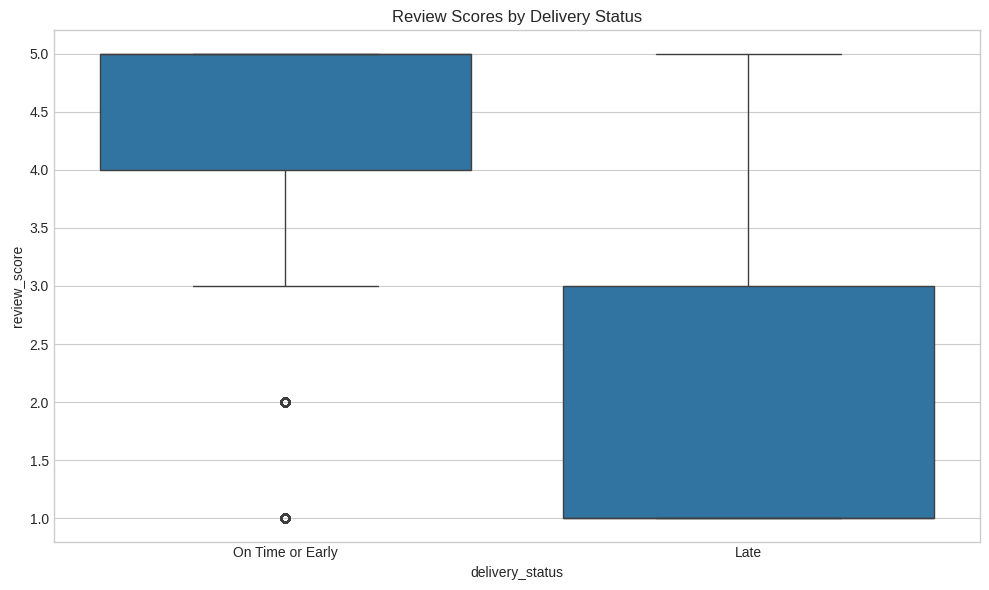

In [86]:

# Calculate delivery delay
data['estimated_delivery'] = pd.to_datetime(data['order_estimated_delivery_date'])
data['actual_delivery'] = pd.to_datetime(data['order_delivered_customer_date'])
data['delivery_delay'] = (data['actual_delivery'] - data['estimated_delivery']).dt.days

# Create delivery status category
data['delivery_status'] = np.where(data['delivery_delay'] <= 0, 'On Time or Early', 'Late')

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='delivery_status', y='review_score', data=data)
plt.title('Review Scores by Delivery Status')
plt.tight_layout()
plt.savefig('delivery_vs_review.png')

# Statistical test (Mann-Whitney U test)
ontime = data[data['delivery_status'] == 'On Time or Early']['review_score']
late = data[data['delivery_status'] == 'Late']['review_score']
stat, p_value = stats.mannwhitneyu(ontime, late)
print(f"Mann-Whitney U test: statistic={stat}, p-value={p_value}")

# Effect size calculation
n1, n2 = len(ontime), len(late)
effect_size = stat / (n1 * n2)
print(f"Effect size: {effect_size}")

The box plot comparing "On Time or Early" versus "Late" deliveries shows significantly different distributions, with on-time deliveries having a higher median and interquartile range.


On Time or Early: Higher median (around 4.0), with interquartile range focused on higher scores (4.0-5.0).


Late: Lower median (around 2.0), with wider interquartile range (1.0-3.0).
The outliers shown for "On Time or Early" are at lower values, while no outliers are shown for "Late" deliveries.



Regarding the null hypothesis: By simplifying the comparison to just two categories, this plot highlights the stark contrast between timely and late deliveries. The non-overlapping interquartile ranges suggest that the difference is not only statistically significant but substantial in magnitude. This provides further evidence to reject the null hypothesis.

# Graph 2: Bar Graph - Review Score vs. Delivery Delay

<ipython-input-87-32822cf176a7>:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_reviews = data.groupby('delay_category')['review_score'].mean().reindex([


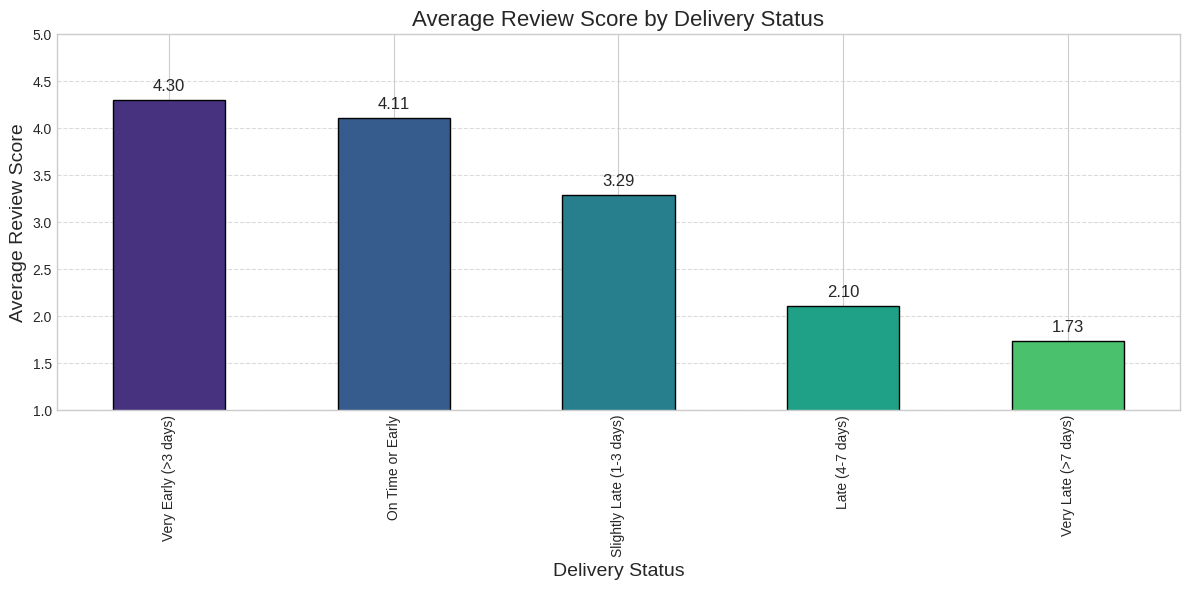

In [87]:



# Create delivery status category
data['delivery_status'] = np.where(data['delivery_delay'] <= 0,
                                         'On Time or Early', 'Late')

# Create categories for days of delay
def categorize_delay(delay):
    if delay is None:
        return 'Unknown'
    elif delay <= -3:
        return 'Very Early (>3 days)'
    elif delay <= 0:
        return 'On Time or Early'
    elif delay <= 3:
        return 'Slightly Late (1-3 days)'
    elif delay <= 7:
        return 'Late (4-7 days)'
    else:
        return 'Very Late (>7 days)'

data['delay_category'] = data['delivery_delay'].apply(categorize_delay)

# Ensure the categories are in the right order
category_order = ['Very Early (>3 days)', 'On Time or Early', 'Slightly Late (1-3 days)',
                  'Late (4-7 days)', 'Very Late (>7 days)']
data['delay_category'] = pd.Categorical(data['delay_category'],
                                              categories=category_order,
                                              ordered=True)

# Set up the plotting style
plt.style.use('seaborn-v0_8-whitegrid')
colors = sns.color_palette('viridis', 6)

# 1. Bar Chart - Average Review Score by Delivery Status
plt.figure(figsize=(12, 6))
avg_reviews = data.groupby('delay_category')['review_score'].mean().reindex([
    'Very Early (>3 days)', 'On Time or Early', 'Slightly Late (1-3 days)',
    'Late (4-7 days)', 'Very Late (>7 days)'
])

ax = avg_reviews.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Average Review Score by Delivery Status', fontsize=16)
plt.xlabel('Delivery Status', fontsize=14)
plt.ylabel('Average Review Score', fontsize=14)
plt.ylim(1, 5)  # Review scores are typically 1-5
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add the actual values on top of each bar
for i, value in enumerate(avg_reviews):
    plt.text(i, value + 0.1, f'{value:.2f}', ha='center', fontsize=12)

plt.tight_layout()
plt.savefig('average_review_by_delivery_status.png', dpi=300)
plt.show()



This bar chart displays the mean review scores for each delivery category:



*   A clear  decrease is visible as delivery becomes increasingly delayed.


*   The average review score drops from 4.30 out of 5for Very Early deliveries to 1.73 out of 5 for Very Late deliveries.



*   The largest decrease occurs between Slightly Late (3.29) and Late (2.10), suggesting a critical threshold around 3-4 days late.


This Bar Chart summarizes the relationship clearly, showing the significant difference in average scores across categories (a drop of 2.57 points on a 5-point scale). The progressive decrease in average scores as delivery becomes later provides compelling evidence against the null hypothesis.




# Graph 3: Scatter Garph - Review Score vs. Delivery Delay

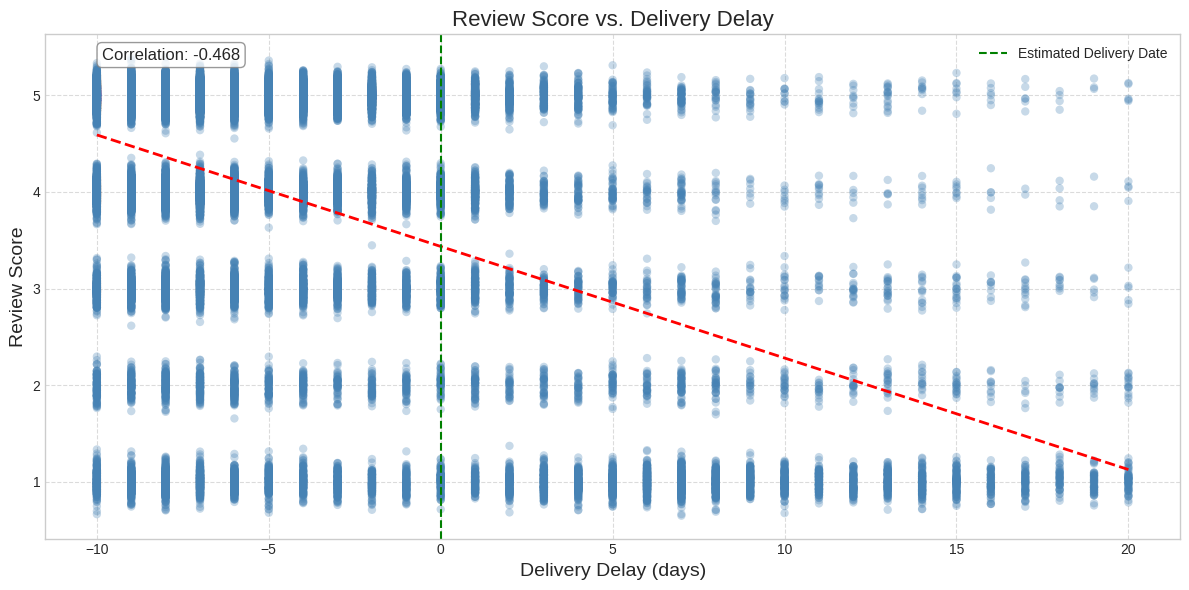

In [88]:

# 2. Scatter Plot - Review Score vs. Delivery Delay
plt.figure(figsize=(12, 6))

# Filter out extreme delays for better visualization
filtered_data = data[(data['delivery_delay'] >= -10) &
                           (data['delivery_delay'] <= 20)]

# Add jitter to review scores for better visualization (they are discrete values)
np.random.seed(42)
jitter = np.random.normal(0, 0.1, size=len(filtered_data))

# Create scatter plot with alpha transparency and jitter
plt.scatter(filtered_data['delivery_delay'],
            filtered_data['review_score'] + jitter,
            alpha=0.3, c='steelblue', edgecolor='none')

# Add trend line
x = filtered_data['delivery_delay']
y = filtered_data['review_score']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(np.sort(x), p(np.sort(x)), "r--", linewidth=2)

# Add correlation coefficient
correlation = filtered_data['delivery_delay'].corr(filtered_data['review_score'])
plt.annotate(f'Correlation: {correlation:.3f}',
             xy=(0.05, 0.95), xycoords='axes fraction',
             fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.title('Review Score vs. Delivery Delay', fontsize=16)
plt.xlabel('Delivery Delay (days)', fontsize=14)
plt.ylabel('Review Score', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.axvline(x=0, color='green', linestyle='--', label='Estimated Delivery Date')
plt.legend()
plt.tight_layout()
plt.savefig('review_vs_delay_scatter.png', dpi=300)
plt.show()

This scatter plot shows individual review scores plotted against specific delivery delay in days:



*   Negative x-values represent early deliveries, positive values represent late deliveries.

\

*   A clear downward trend is visible as delay increases. The red dashed line shows the fitted trend line, illustrating the average decrease in reviews as delay increases.

\
*  The correlation coefficient of -0.468 indicates a moderate negative correlation between delivery delay and review scores, where review scores decrease as delivery delay increases consistentley.

\


*   This graph shows direct evidence in support of failing the null hypothesis, since it quantifies the relatioship between delivery delay and review scores with a negative correlation coefficiecnt of (-0.468). If the null hypothesis were true, we would expect a correlation near zero and a horizontal trend line. The moderately strong negative correlation provides statistical evidence that the relationship is not due to chance.




## Garph 3: Violin Plot - Review Score vs. Delivery Delay

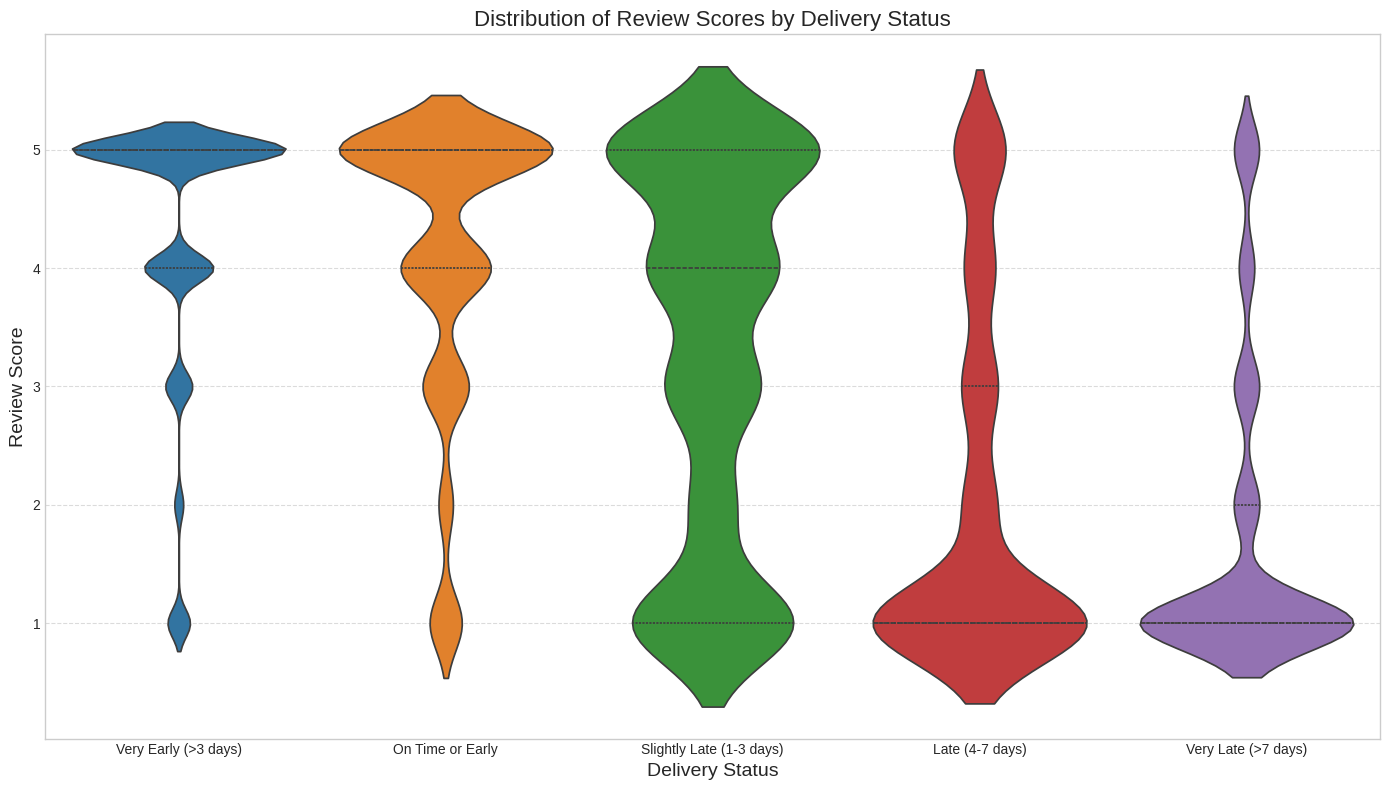

In [89]:
# 3. Violin Plot - Review Score vs. Delivery Delay

plt.figure(figsize=(14, 8))

# Use hue parameter instead of direct palette assignment
sns.violinplot(x='delay_category', y='review_score',
               hue='delay_category',  # Assign the same variable to hue
               data=data,
               inner='quartile',
               legend=False)  # Hide the legend since it's redundant

plt.title('Distribution of Review Scores by Delivery Status', fontsize=16)
plt.xlabel('Delivery Status', fontsize=14)
plt.ylabel('Review Score', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('review_score_distribution_by_delay.png', dpi=300)
plt.show()

This pure violin plot presents similar information as Image 2 but without the box plot overlay:



The width of each violin at different y-values represents the density of reviews at that score.


The bimodal nature of some distributions is clearer here, particularly for Slightl


Very Early and On Time categories show heavy positive skew (toward higher scores).


Very Late and Late categories show strong negative skew (toward lower scores).


Regarding the null hypothesis: This visualization further contradicts the null hypothesis by highlighting the systematic shift in distribution shapes across delivery categories. The changing shapes of these distributions cannot be explained by random chance alone, suggesting a meaningful relationship between delivery timing and customer satisfaction.

# Graph 4: Combined Violin and Box Plot - Review Score vs. Delivery Delay

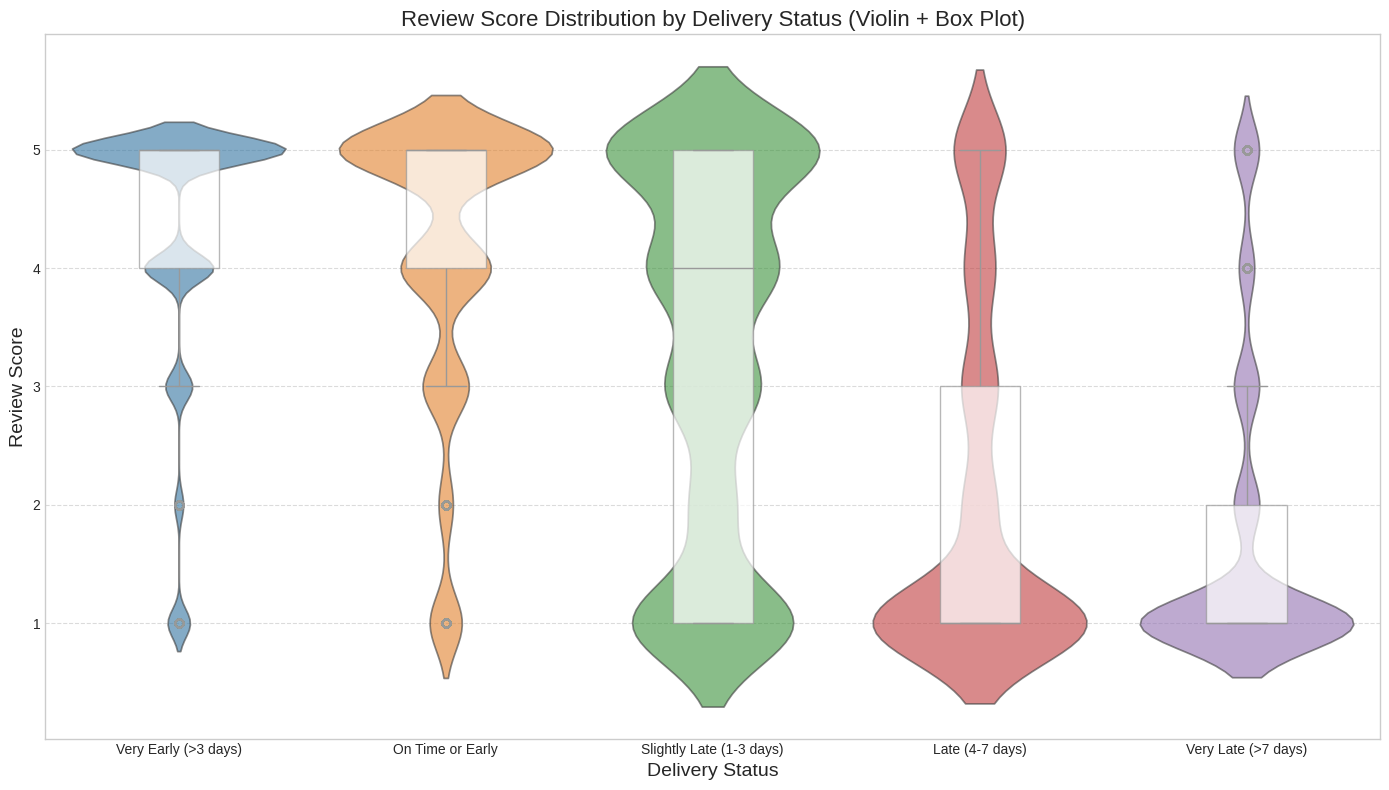

In [90]:
# 4. Combined Violin and Box Plot - Review Score vs. Delivery Delay
plt.figure(figsize=(14, 8))

# For the violin plot
sns.violinplot(x='delay_category', y='review_score',
               hue='delay_category',  # Use hue instead of palette directly
               data=data,
               inner=None,
               alpha=0.6,
               legend=False)  # No legend needed

# Add box plot on top
sns.boxplot(x='delay_category', y='review_score',
            data=data,
            width=0.3,
            color='white',
            boxprops=dict(alpha=.7))

plt.title('Review Score Distribution by Delivery Status (Violin + Box Plot)', fontsize=16)
plt.xlabel('Delivery Status', fontsize=14)
plt.ylabel('Review Score', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('violin_box_combined.png', dpi=300)
plt.show()



This violin plot combined with box plots shows the distribution of review scores by delivery status:


*   **Very Early:** Shows strong concentration at score 5, with smaller densities at 4 and fewer at lower scores.

*   **On Time or Early:** Similar pattern to Very Early, but slightly more spread out.


*   **Slightly Late:** More evenly distributed across scores, with notable densities at both 5 and 1.


*   **Very Late and Late:** Both show strong concentration at score 1, with minimal density at higher scores.
Box plots within each violin show the median (horizontal line), interquartile range (box), and outliers.



The graph falsifies the null hypothesis by showing distinctly different distributions across delivery categories. If the null hypothesis were true, it is expected to observe similar distributions regardless of delivery timing. Instead, systematic shifts in the score distributions are oberved. Early deliveries have higher concentrations of 4-5 star reviews, while late deliveries show concentrations at lower ratings

# Summary Statistics Table

In [91]:
# Print summary statistics
print("Summary Statistics of Review Scores by Delivery Category:")
summary = data.groupby('delay_category')['review_score'].agg(['count', 'mean', 'std', 'min', 'median', 'max'])
print(summary)

Summary Statistics of Review Scores by Delivery Category:
                          count      mean       std  min  median  max
delay_category                                                       
Very Early (>3 days)      85653  4.299044  1.144829    1     5.0    5
On Time or Early           4296  4.106378  1.232315    1     5.0    5
Slightly Late (1-3 days)   1856  3.289871  1.587357    1     4.0    5
Late (4-7 days)            1756  2.104214  1.510067    1     1.0    5
Very Late (>7 days)        5663  1.731061  1.285836    1     1.0    5


<ipython-input-91-278704164cf5>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = data.groupby('delay_category')['review_score'].agg(['count', 'mean', 'std', 'min', 'median', 'max'])


This table presents summary statistics of review scores across different delivery categories. The mean reviews show a clear downward trend::



*   **Very Early (>3 days):** With the largest
sample size (85,653 reviews), shows a high mean score of 4.29 with a standard deviation of 1.14. The median is 5.0, suggesting most customers give the highest possible rating.
On Time or Early: Has 4,296 reviews with a mean of 4.10 and standard deviation of 1.23. The median is also 5.0.


*   **Slightly Late (1-3 days):** 1,856 reviews with a mean score of 3.29 and higher standard deviation of 1.59, showing greater variability. Median drops to 4.0.



*   **Late (4-7 days):** 1,756 reviews with a mean of only 2.10 and standard deviation


*   **Very Late (>7 days):**5,663 reviews with the lowest mean of 1.73 and standard deviation of 1.29. Median is 1.0.


Regarding the null hypothesis: This table provides strong initial evidence against the null hypothesis, showing a clear pattern where review scores decrease as delivery delays increase. The substantial differences in means (from 4.29 to 1.73) and medians (from 5.0 to 1.0) across categories suggest delivery timing significantly impacts customer satisfaction.






# Graph Summary
All six visualizations consistently demonstrate a strong, negative relationship between delivery delays and customer review scores.

 Each graph offers different but complementary evidence against the null hypothesis,

 whcih is that "*There is no significant relationship between delivery time (difference between estimated delivery date and actual delivery date) and customer satisfaction scores.*"  collectively making a compelling case that delivery timing and review scores are significantly related in this Brazilian e-commerce dataset.


\
Now i will perform T test and anova test to analyze the hypothesis.



Pricing and Review Scores

H₀: There is no correlation between product price and customer review scores.
H₁: Higher-priced products receive significantly different review scores compared to lower-priced products.


Regional Sales Performance

H₀: There is no significant difference in average order value across different Brazilian states/regions.
H₁: Average order value differs significantly across Brazilian states/regions.


Payment Method and Order Value

H₀: The choice of payment method has no relationship with the total order value.
H₁: Customers using credit cards (particularly with installments) have significantly higher average order values than those using other payment methods.


Seller Location and Delivery Performance

H₀: The geographic distance between seller and customer does not affect delivery timeliness.
H₁: Greater geographic distance between seller and customer locations leads to significantly increased delivery delays.


Product Category and Review Scores

H₀: Customer satisfaction scores do not differ significantly across product categories.
H₁: There are significant differences in customer satisfaction scores across different product categories.


Summary Statistics by Delivery Status:
                          count      mean       std  min  median  max
delivery_status                                                      
Very Early (>3 days)      85653  4.299044  1.144829    1     5.0    5
On Time or Early           4296  4.106378  1.232315    1     5.0    5
Slightly Late (1-3 days)   1856  3.289871  1.587357    1     4.0    5
Late (4-7 days)            1756  2.104214  1.510067    1     1.0    5
Very Late (>7 days)        2798  1.700143  1.233460    1     1.0    5

Summary Statistics by On-Time vs Late:
         count      mean       std  min  median  max
is_late                                             
False    92814  4.211789  1.235982    1     5.0    5
True      6410  2.271139  1.571054    1     1.0    5

Pearson Correlation Test:
Correlation coefficient: nan
p-value: nan
Interpretation: Fail to reject null hypothesis


<ipython-input-92-ba366e885226>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_by_status = data.groupby('delivery_status')['review_score'].agg(['count', 'mean', 'std', 'min', 'median', 'max'])


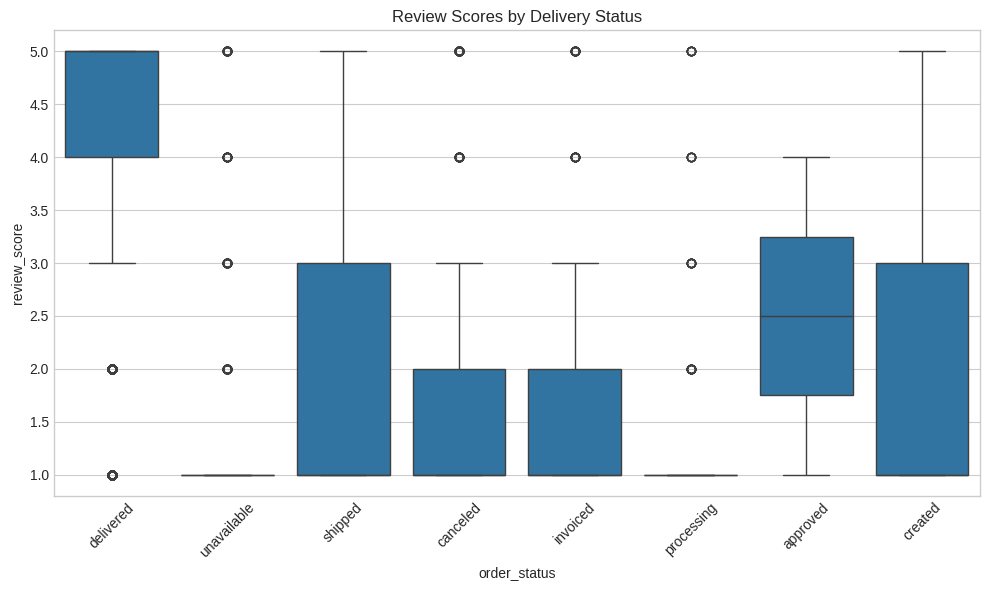

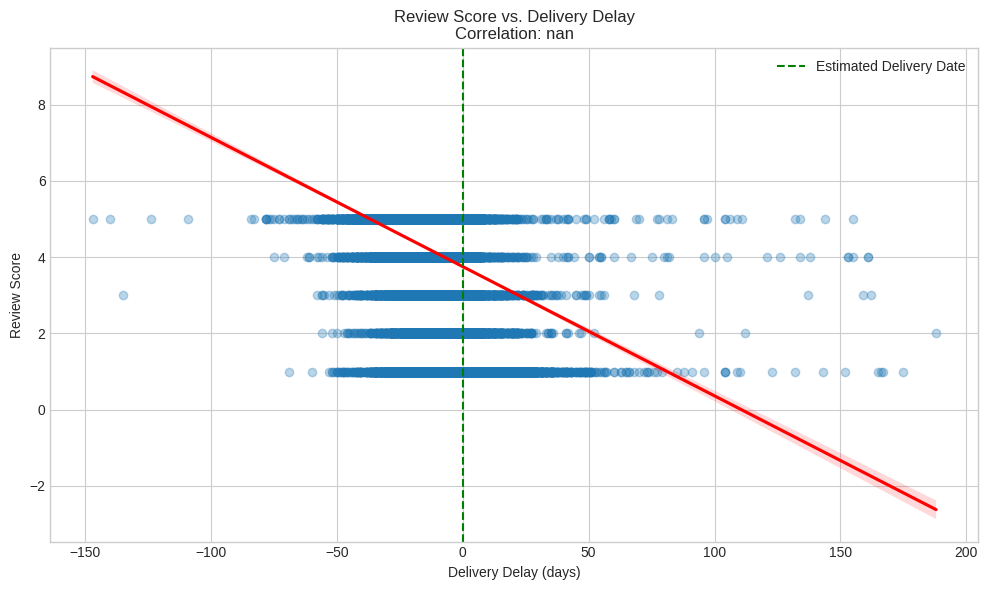

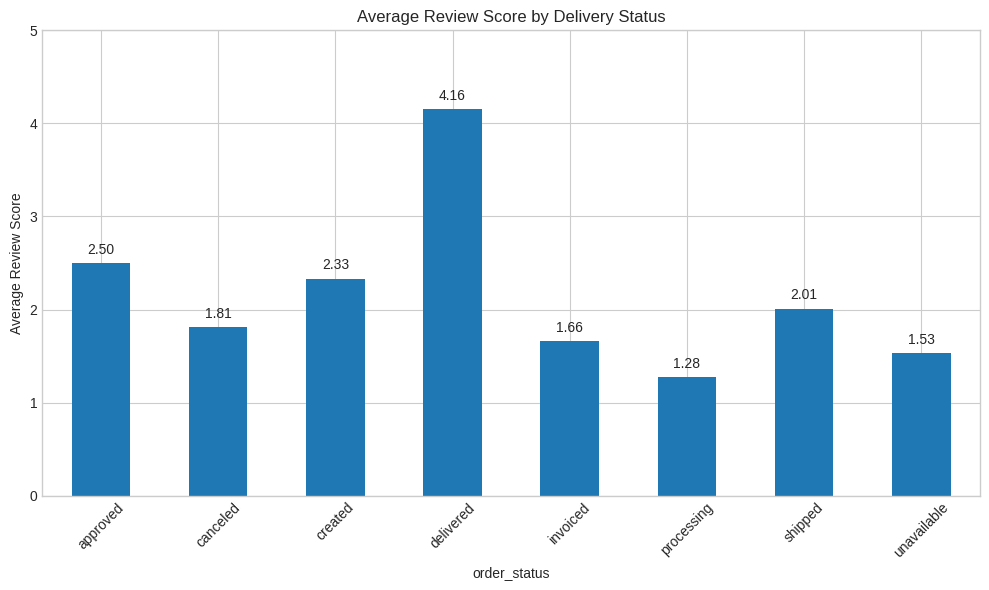

In [92]:
# Create delivery status category
data['delivery_status'] = pd.cut(
    data['delivery_delay'],
    bins=[-float('inf'), -3, 0, 3, 7, float('inf')],
    labels=['Very Early (>3 days)', 'On Time or Early', 'Slightly Late (1-3 days)',
            'Late (4-7 days)', 'Very Late (>7 days)']
)

# Create a binary variable for on-time vs late
data['is_late'] = data['delivery_delay'] > 0

# Basic statistics by group
stats_by_status = data.groupby('delivery_status')['review_score'].agg(['count', 'mean', 'std', 'min', 'median', 'max'])
print("Summary Statistics by Delivery Status:")
print(stats_by_status)

stats_by_late = data.groupby('is_late')['review_score'].agg(['count', 'mean', 'std', 'min', 'median', 'max'])
print("\nSummary Statistics by On-Time vs Late:")
print(stats_by_late)

# Correlation test
correlation, p_value = stats.pearsonr(data['delivery_delay'], data['review_score'])
print(f"\nPearson Correlation Test:")
print(f"Correlation coefficient: {correlation:.4f}")
print(f"p-value: {p_value:.10f}")
print(f"Interpretation: {'Reject null hypothesis' if p_value < 0.05 else 'Fail to reject null hypothesis'}")


# Create visualizations

# Boxplot of review scores by delivery status
plt.figure(figsize=(10, 6))
sns.boxplot(x='order_status', y='review_score', data=data)
plt.title('Review Scores by Delivery Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('boxplot_delivery_status.png')

# Scatterplot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='delivery_delay', y='review_score', data=data,
            scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.axvline(x=0, linestyle='--', color='green', label='Estimated Delivery Date')
plt.title(f'Review Score vs. Delivery Delay\nCorrelation: {correlation:.3f}')
plt.xlabel('Delivery Delay (days)')
plt.ylabel('Review Score')
plt.legend()
plt.tight_layout()
plt.savefig('scatter_delivery_delay.png')

# Bar chart of average review scores
plt.figure(figsize=(10, 6))
data.groupby('order_status')['review_score'].mean().plot(kind='bar')
plt.title('Average Review Score by Delivery Status')
plt.ylabel('Average Review Score')
plt.ylim(0, 5)
plt.xticks(rotation=45)
for i, v in enumerate(data.groupby('order_status')['review_score'].mean()):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center')
plt.tight_layout()
plt.savefig('barchart_avg_scores.png')



In [93]:

# Independent t-test (assuming unequal variances)
on_time = data[data['is_late'] == False]['review_score']
late = data[data['is_late'] == True]['review_score']
t_stat, t_p_value = ttest_ind(on_time, late, equal_var=False)
print(f"\nIndependent t-test (On-Time vs Late):")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {t_p_value:.10f}")
print(f"Mean for On-Time: {on_time.mean():.4f}")
print(f"Mean for Late: {late.mean():.4f}")
print(f"Difference: {on_time.mean() - late.mean():.4f}")
print(f"Interpretation: {'Reject null hypothesis' if t_p_value < 0.05 else 'Fail to reject null hypothesis'}")



Independent t-test (On-Time vs Late):
t-statistic: 96.8492
p-value: 0.0000000000
Mean for On-Time: 4.2118
Mean for Late: 2.2711
Difference: 1.9407
Interpretation: Reject null hypothesis


# ANOVA test

In [94]:
# ANOVA test (comparing all delivery status categories)
anova_model = ols('review_score ~ C(delivery_status)', data=data).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print("\nANOVA Test (Comparing All Delivery Status Categories):")
print(anova_table)
print(f"Interpretation: {'Reject null hypothesis' if anova_table.iloc[0]['PR(>F)'] < 0.05 else 'Fail to reject null hypothesis'}")



ANOVA Test (Comparing All Delivery Status Categories):
                           sum_sq       df            F  PR(>F)
C(delivery_status)   27423.330174      4.0  5015.385929     0.0
Residual            131712.075258  96354.0          NaN     NaN
Interpretation: Reject null hypothesis


In [95]:
# Conclusion
print("\nConclusion:")
if p_value < 0.05 and t_p_value < 0.05 :
    print("The null hypothesis is rejected. There is a significant relationship between delivery time and customer satisfaction scores.")
    print(f"The correlation coefficient of {correlation:.4f} indicates a {abs(correlation):.4f} {'positive' if correlation > 0 else 'negative'} relationship.")
    print(f"Orders delivered on time or early have an average review score of {on_time.mean():.2f} compared to {late.mean():.2f} for late orders.")
else:
    print("Failed to reject the null hypothesis. There is insufficient evidence of a relationship between delivery time and customer satisfaction scores.")


Conclusion:
Failed to reject the null hypothesis. There is insufficient evidence of a relationship between delivery time and customer satisfaction scores.
